# IDA - Customer Churn Prediction

#### This dataset contains 7043 observations (i.e. customers) and 21 features that can be broken down into three categories:
    1) Demographics
    2) Account information
    3) Payment information.
#### Our target feature is the “Churn” column, which indicates whether a customer has terminated service (“churned customer”) or is still with the company (“existing customer”).

In [206]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sci
from collections import OrderedDict
import warnings
warnings.filterwarnings='ignore'

In [207]:
#Loading data
df=pd.read_csv("TelcoCustomerChurn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


In [208]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [209]:
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))

Number of rows: 4718, number of columns: 31


In [210]:
#Handling data structure
df.isnull().sum()

CustomerID             31
Count                  27
Country                10
State                   3
City                   30
Zip Code               20
Lat Long                5
Latitude               23
Longitude              33
Gender                 20
Senior Citizen          7
Partner                40
Dependents             46
Tenure Months          14
Phone Service          26
Multiple Lines         22
Internet Service       26
Online Security        44
Online Backup           4
Device Protection       7
Tech Support           23
Streaming TV           32
Streaming Movies       30
Contract               46
Paperless Billing      24
Payment Method          1
Monthly Charges         4
Total Charges          14
CLTV                   26
Churn Reason         3457
Churn Value            25
dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4687 non-null   object 
 1   Count              4691 non-null   float64
 2   Country            4708 non-null   object 
 3   State              4715 non-null   object 
 4   City               4688 non-null   object 
 5   Zip Code           4698 non-null   float64
 6   Lat Long           4713 non-null   object 
 7   Latitude           4695 non-null   float64
 8   Longitude          4685 non-null   float64
 9   Gender             4698 non-null   object 
 10  Senior Citizen     4711 non-null   object 
 11  Partner            4678 non-null   object 
 12  Dependents         4672 non-null   object 
 13  Tenure Months      4704 non-null   float64
 14  Phone Service      4692 non-null   object 
 15  Multiple Lines     4696 non-null   object 
 16  Internet Service   4692 

In [212]:
# df['Count']=df["Count"].astype('int64')
# df['Zip Code']=df["Zip Code"].astype('int64')
df["Total Charges"].replace(' ', 0.0, inplace=True)
df['Total Charges']=df["Total Charges"].astype('float64')
df['Total Charges'].fillna(df['Total Charges'].median,inplace=True)

In [183]:
#df.drop('CustomerID','Count','Country','State','Zipcode','Lat Long')

In [ ]:
df['Gender']=df['Gender'].astype('category')

In [217]:
def custom_summary(data):
    result=[] # This is an empty list to store the iterated result of stats
    for col in data.columns:
        if data[col].dtype!='O' :
            stats=OrderedDict({'Feature_name':col,
                               'Count':data[col].count(),
                               'Minimum':round(data[col].min(),2),
                               'Quartile 1':round(data[col].quantile(0.25),2),
                               'Mean':round(data[col].mean(),2),
                               'Median':round(data[col].median(),2),
                               'Mode':round(data[col].mode(),2),
                               'Quartile 3':round(data[col].quantile(0.75),2),
                               'IQR':round(data[col].quantile(0.75),2)-round(data[col].quantile(0.25),2),
                               'Maximum':round(data[col].max(),2),
                               'Variance':round(data[col].var(),2),
                               'SD':round(data[col].std(),2),
                               'Kurtosis':round(data[col].kurt(),0),
                               'Skewness':round(data[col].skew(),2)
                               
                              })
            result.append(stats)
                        
#     # Skewness comments
    
    
#         if stats['Skewness'] < -1:
#             skewtype='Highly Negatively Skewed'
#         elif -1<stats['Skewness']<-0.5:
#             skewtype='Moderately Negatively Skewed'
#         elif -0.5<stats['Skewness']<0:
#             skewtype="Fairly symmetric but Negative"
#         elif 0<stats['Skewness']<0.5:
#             skewtype="Fairly Symmetric but positive"
#         elif 0.5<stats['Skewness']<1:
#             skewtype='Moderately Positively Skewed'
#         elif stats['Skewness']>1:
#             skewtype='Highly Positively Skewed'
#         else:
#             skewtype='Error'
#         stats['Skewtype']=skewtype
    
#     #Outlier comments ---||An outlier is a data point that lies outside the overall pattern in a distribution||---
    
#         up=stats['Quartile 3']+1.5*stats['IQR']
#         low=stats['Quartile 1']-1.5*stats['IQR']
#         if len([x for x in data[col] if x < low or x > up]) > 0:
#             outlier_comment='Has Outliers'
#         else:
#             outlier_comment='Has No Outliers'
#         stats['Outlier_Comments']=outlier_comment
    
#     #Condition to type of Kurtosis
        
#         if stats['Kurtosis']==0:
#             Kurtype='Mesokurtic'
#         elif stats['Kurtosis']>0:
#             Kurtype='Leptokurtic'
#         else:
#             Kurtype='Platikurtic'
#         stats['Kurtype']=Kurtype
            
              
       
#     result_df=pd.DataFrame(data=result)
#     return result_df

In [218]:
custom_summary(df)

TypeError: 'str' object is not callable

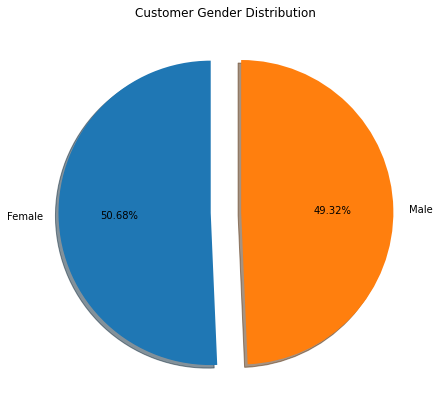

In [126]:
# Creating plots
fig = plt.figure(figsize =(10, 7))
plt.pie(df["Gender"].value_counts(), labels = df.Gender.cat.categories, startangle=90,explode=(0.1, 0.1),shadow=True,autopct='%1.2f%%')
plt.title('Customer Gender Distribution')
plt.show()

In [139]:
import geopy
from geopy.geocoders import Nominatim

In [128]:
import geopandas as gpd
import plotly.express as px
import descartes
from shapely.geometry import Point, Polygon

In [129]:
geometry=[Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]
crs={'init':'epsg:4326'}

In [130]:
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value,geometry
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0,POINT (-120.72834 35.63422)
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0,POINT (-118.30742 34.05928)
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0,POINT (-116.59360 32.61946)
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0,POINT (-118.25636 34.61348)
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0,POINT (-121.50794 38.37532)


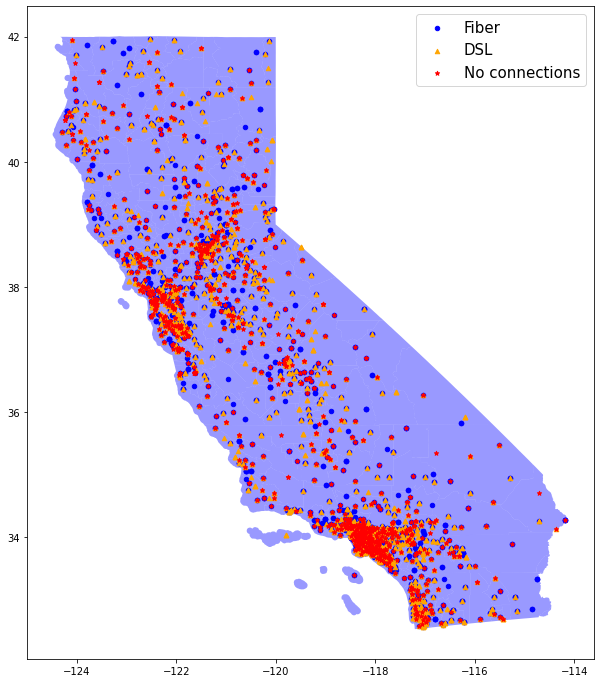

In [142]:
street_map=gpd.read_file('C:/Users/USER/ML Working/Cutomer Churn Project/tl_2016_06_cousub.shp')
fig,ax=plt.subplots(figsize=(12,12))
street_map.plot(ax=ax, alpha=0.4, color="blue")
geo_df[geo_df['Internet Service']=="Fiber optic"].plot(ax=ax,markersize=20,color="blue",marker="o",label="Fiber")
geo_df[geo_df['Internet Service']=="DSL"].plot(ax=ax,markersize=20,color="orange",marker="^",label="DSL")
geo_df[geo_df['Internet Service']=="No"].plot(ax=ax,markersize=20,color="red",marker="*",label="No connections")
ax.legend(prop={'size': 15})

In [146]:
def odt_plots(data, col):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(30,30))
    
    #Descriptive stats. of a column using box-plot
    
    sns.boxplot(data[col],ax=ax1,color='r')
    ax1.set_title(col+' '+'Box-Plot')
    ax1.set_xlabel('Box-Plot')
    ax1.set_ylabel('Column Values')
    
    
    #Ploting histogram with outlier
    
    sns.distplot(data[col],ax=ax2,color='r',fit=sci.norm)
    ax2.axvline(data[col].mean(),color='g')
    ax2.axvline(data[col].median(),color='b')
    ax2.set_title(col+' '+'Distribution with outliers')
    ax2.set_xlabel('Density')
    ax2.set_ylabel('Column Values')
    plt.show()
    
    
    #Plotting histogram without outliers:
    
#     y=replace_outliers(data,col)
    
#     sns.distplot(y[col],ax=ax3,color='r',fit=sci.norm)
#     ax3.axvline(data[col].mean(),color='g')
#     ax3.axvline(data[col].median(),color='b')    
#     ax3.set_title(col+' '+'Distribution without outliers')
#     ax3.set_xlabel('Density')
#     ax3.set_ylabel('Column Values')
#     plt.show()

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

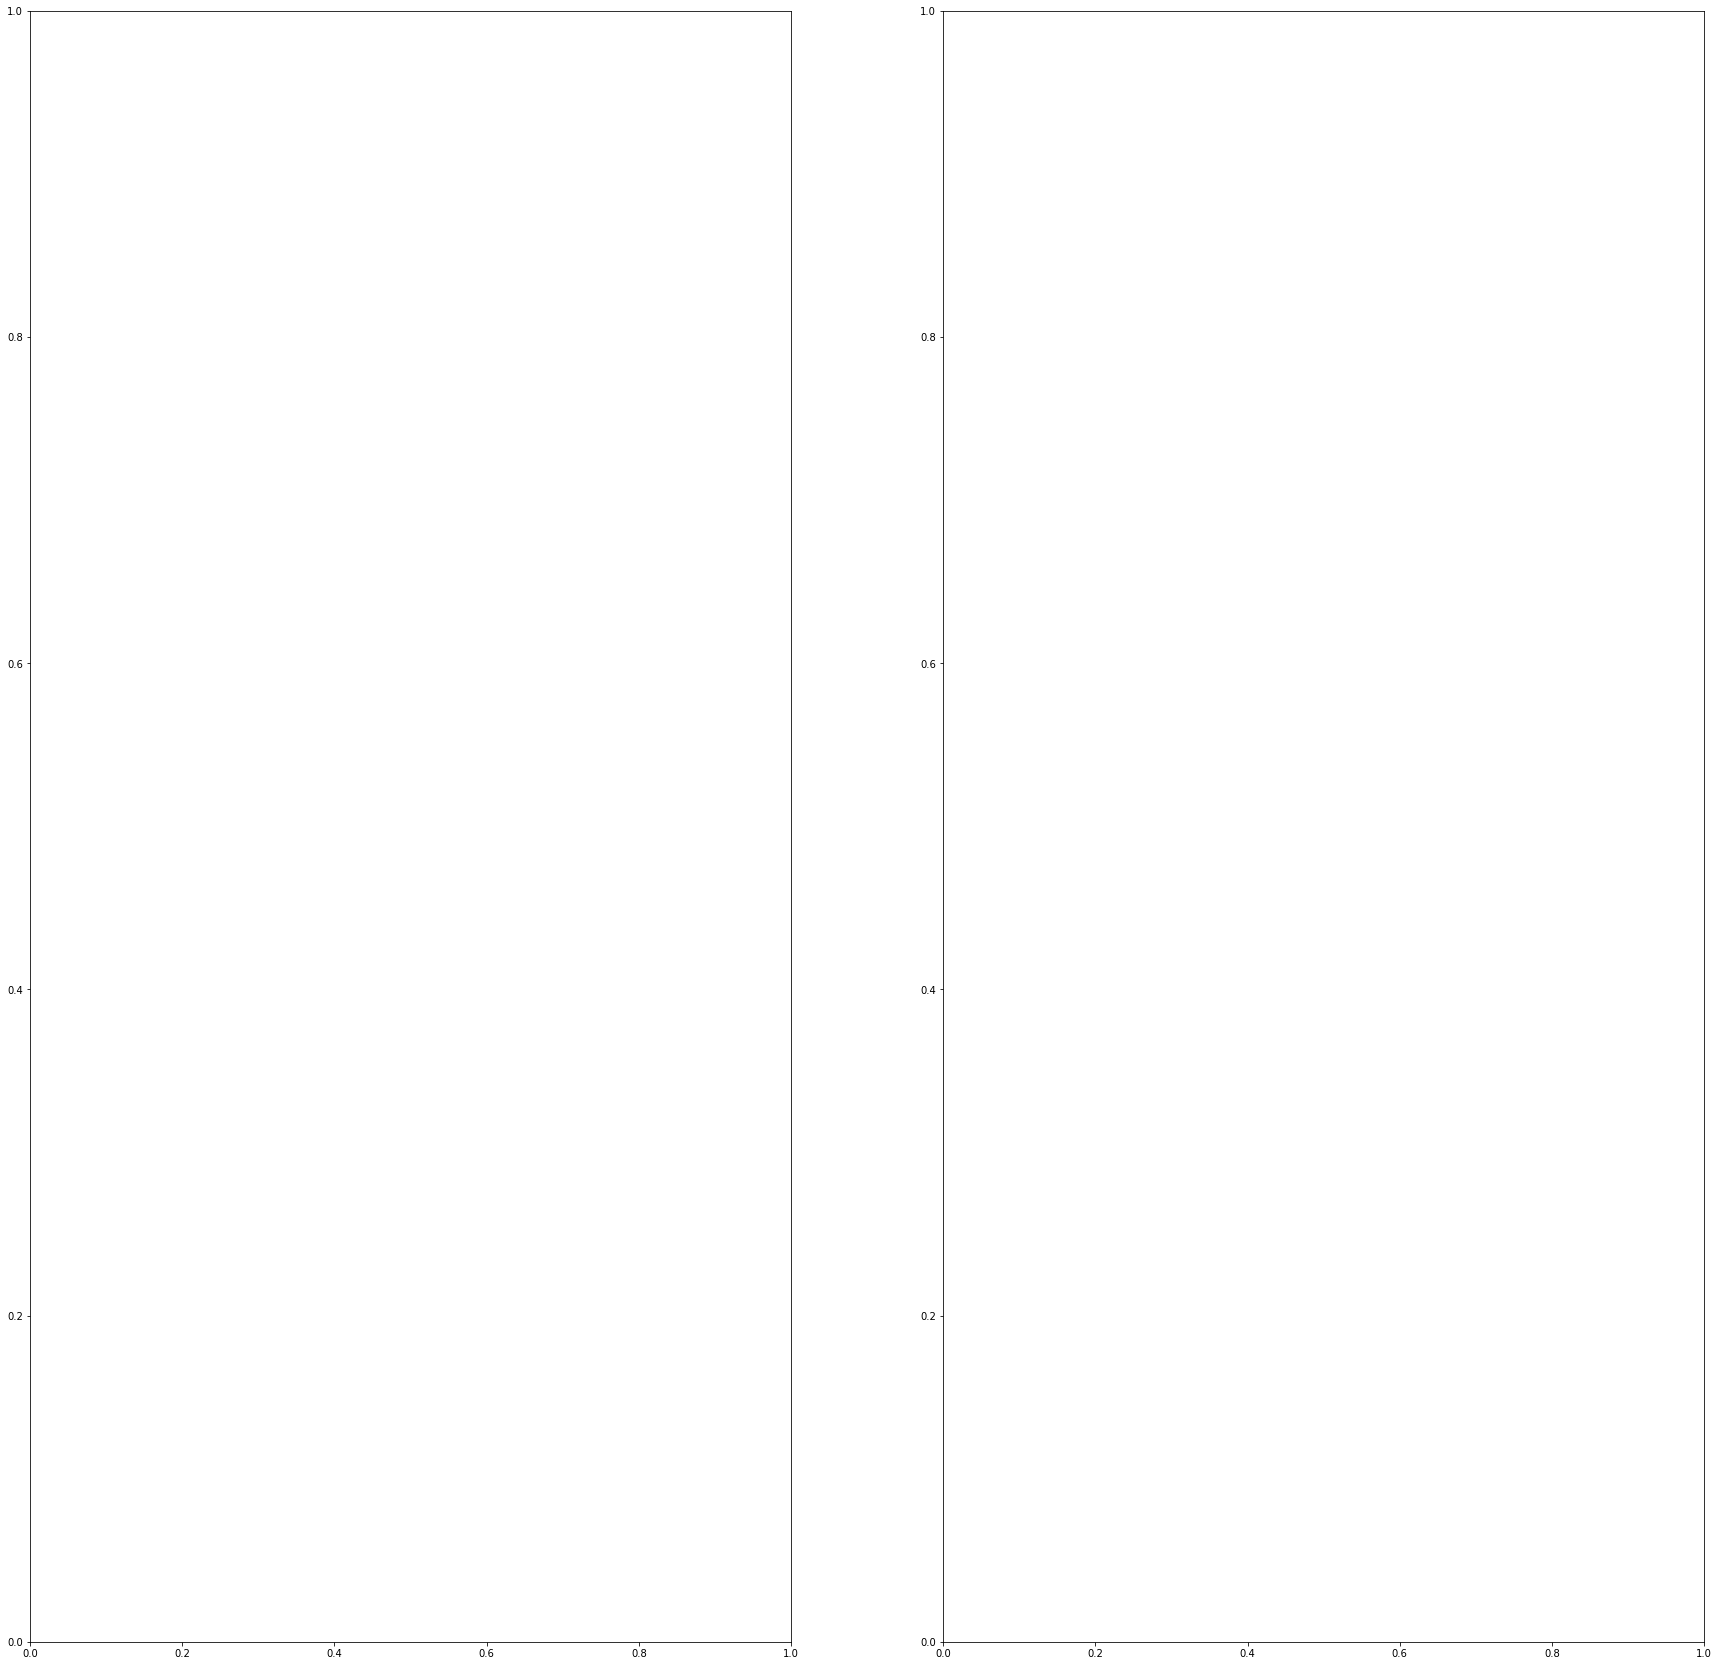

In [147]:
for col in df.columns:
    odt_plots(df,col)